In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA LOAD

In [6]:
train_eegs_dir = '/kaggle/input/hms-harmful-brain-activity-classification/train_eegs'
train_df = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
test_df = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/test.csv')
sub_df = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/sample_submission.csv')

## EDA

In [3]:
display(train_df.head())
print(f'Train rows: {len(train_df)}')
display(train_df.describe())
display(test_df.head())
print(f'Test rows: {len(test_df)}')
display(sub_df.head())
print(f'Sub rows: {len(sub_df)}')

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


Train rows: 106800


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


Test rows: 1


,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


Sub rows: 1


In [8]:
sample_train_eeg_id = '568657'

sample_train_eeg = pd.read_parquet(f'{train_eegs_dir}/{sample_train_eeg_id}.parquet')
display(sample_train_eeg.head())
print(len(sample_train_eeg))
train_df[train_df['eeg_id'] == int(sample_train_eeg_id)]

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-75.360001,86.379997,65.470001,62.580002,170.350006,92.370003,39.68,89.870003,18.260000,-28.440001,-15.190000,16.93,13.81,-42.160000,78.099998,-143.649994,121.239998,-1.470000,72.550003,-3090.090088
1,-107.739998,53.139999,32.590000,21.950001,140.500000,59.070000,4.26,53.310001,-18.490000,-63.270000,-52.110001,-13.23,-16.42,-80.430000,64.449997,-168.500000,88.400002,-28.520000,40.250000,5560.439941
2,-103.050003,46.330002,10.750000,9.150000,137.820007,50.950001,-3.50,45.070000,-20.879999,-66.629997,-69.750000,-9.20,-21.40,-93.089996,5.120000,-176.089996,51.689999,-38.639999,31.820000,-4161.450195
3,-75.099998,77.870003,40.150002,31.790001,166.630005,76.769997,17.99,67.650002,11.140000,-32.950001,-38.509998,14.77,9.79,-66.480003,48.220001,-147.990005,86.629997,-18.639999,62.509998,31769.970703
4,-97.919998,58.209999,27.330000,5.340000,144.080002,47.200001,-10.43,40.250000,-12.350000,-52.500000,-54.919998,-10.07,-8.04,-90.820000,67.269997,-164.710007,80.680000,-36.520000,41.830002,6879.720215


13200


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
40927,568657,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7
40928,568657,1,6.0,789577333,1,6.0,3640441665,20654,Other,0,0,3,0,2,7
40929,568657,2,12.0,789577333,2,12.0,1364530340,20654,Other,0,0,3,0,2,7
40930,568657,3,16.0,789577333,3,16.0,1874525225,20654,Other,0,0,3,0,2,7


In [9]:
train_spec_dir = '/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms'
print(f'Items in train_eegs: {len(os.listdir(train_eegs_dir))}')
print(f'Items in train_spectrograms: {len(os.listdir(train_spec_dir))}')

Items in train_eegs: 17300
Items in train_spectrograms: 11138


In [10]:
train_df.groupby(by='eeg_id').agg({'patient_id':'nunique',
                                       'spectrogram_id':'nunique',
                                       'expert_consensus':'nunique'})['expert_consensus'].unique()

array([1, 3, 2, 4, 5])

In [11]:
train_df.groupby(by='spectrogram_id').agg({'eeg_id':'nunique',
                                       'patient_id':'nunique',
                                       'expert_consensus':'nunique'})

,eeg_id,patient_id,expert_consensus
spectrogram_id,,,
353733,1,1,1
924234,1,1,1
999431,1,1,1
1084844,1,1,1
1219001,3,1,1
...,...,...,...
2146188334,1,1,1
2146414988,1,1,1
2146798838,3,1,1


In [12]:
print(len(train_df['eeg_id'].unique()))

17089


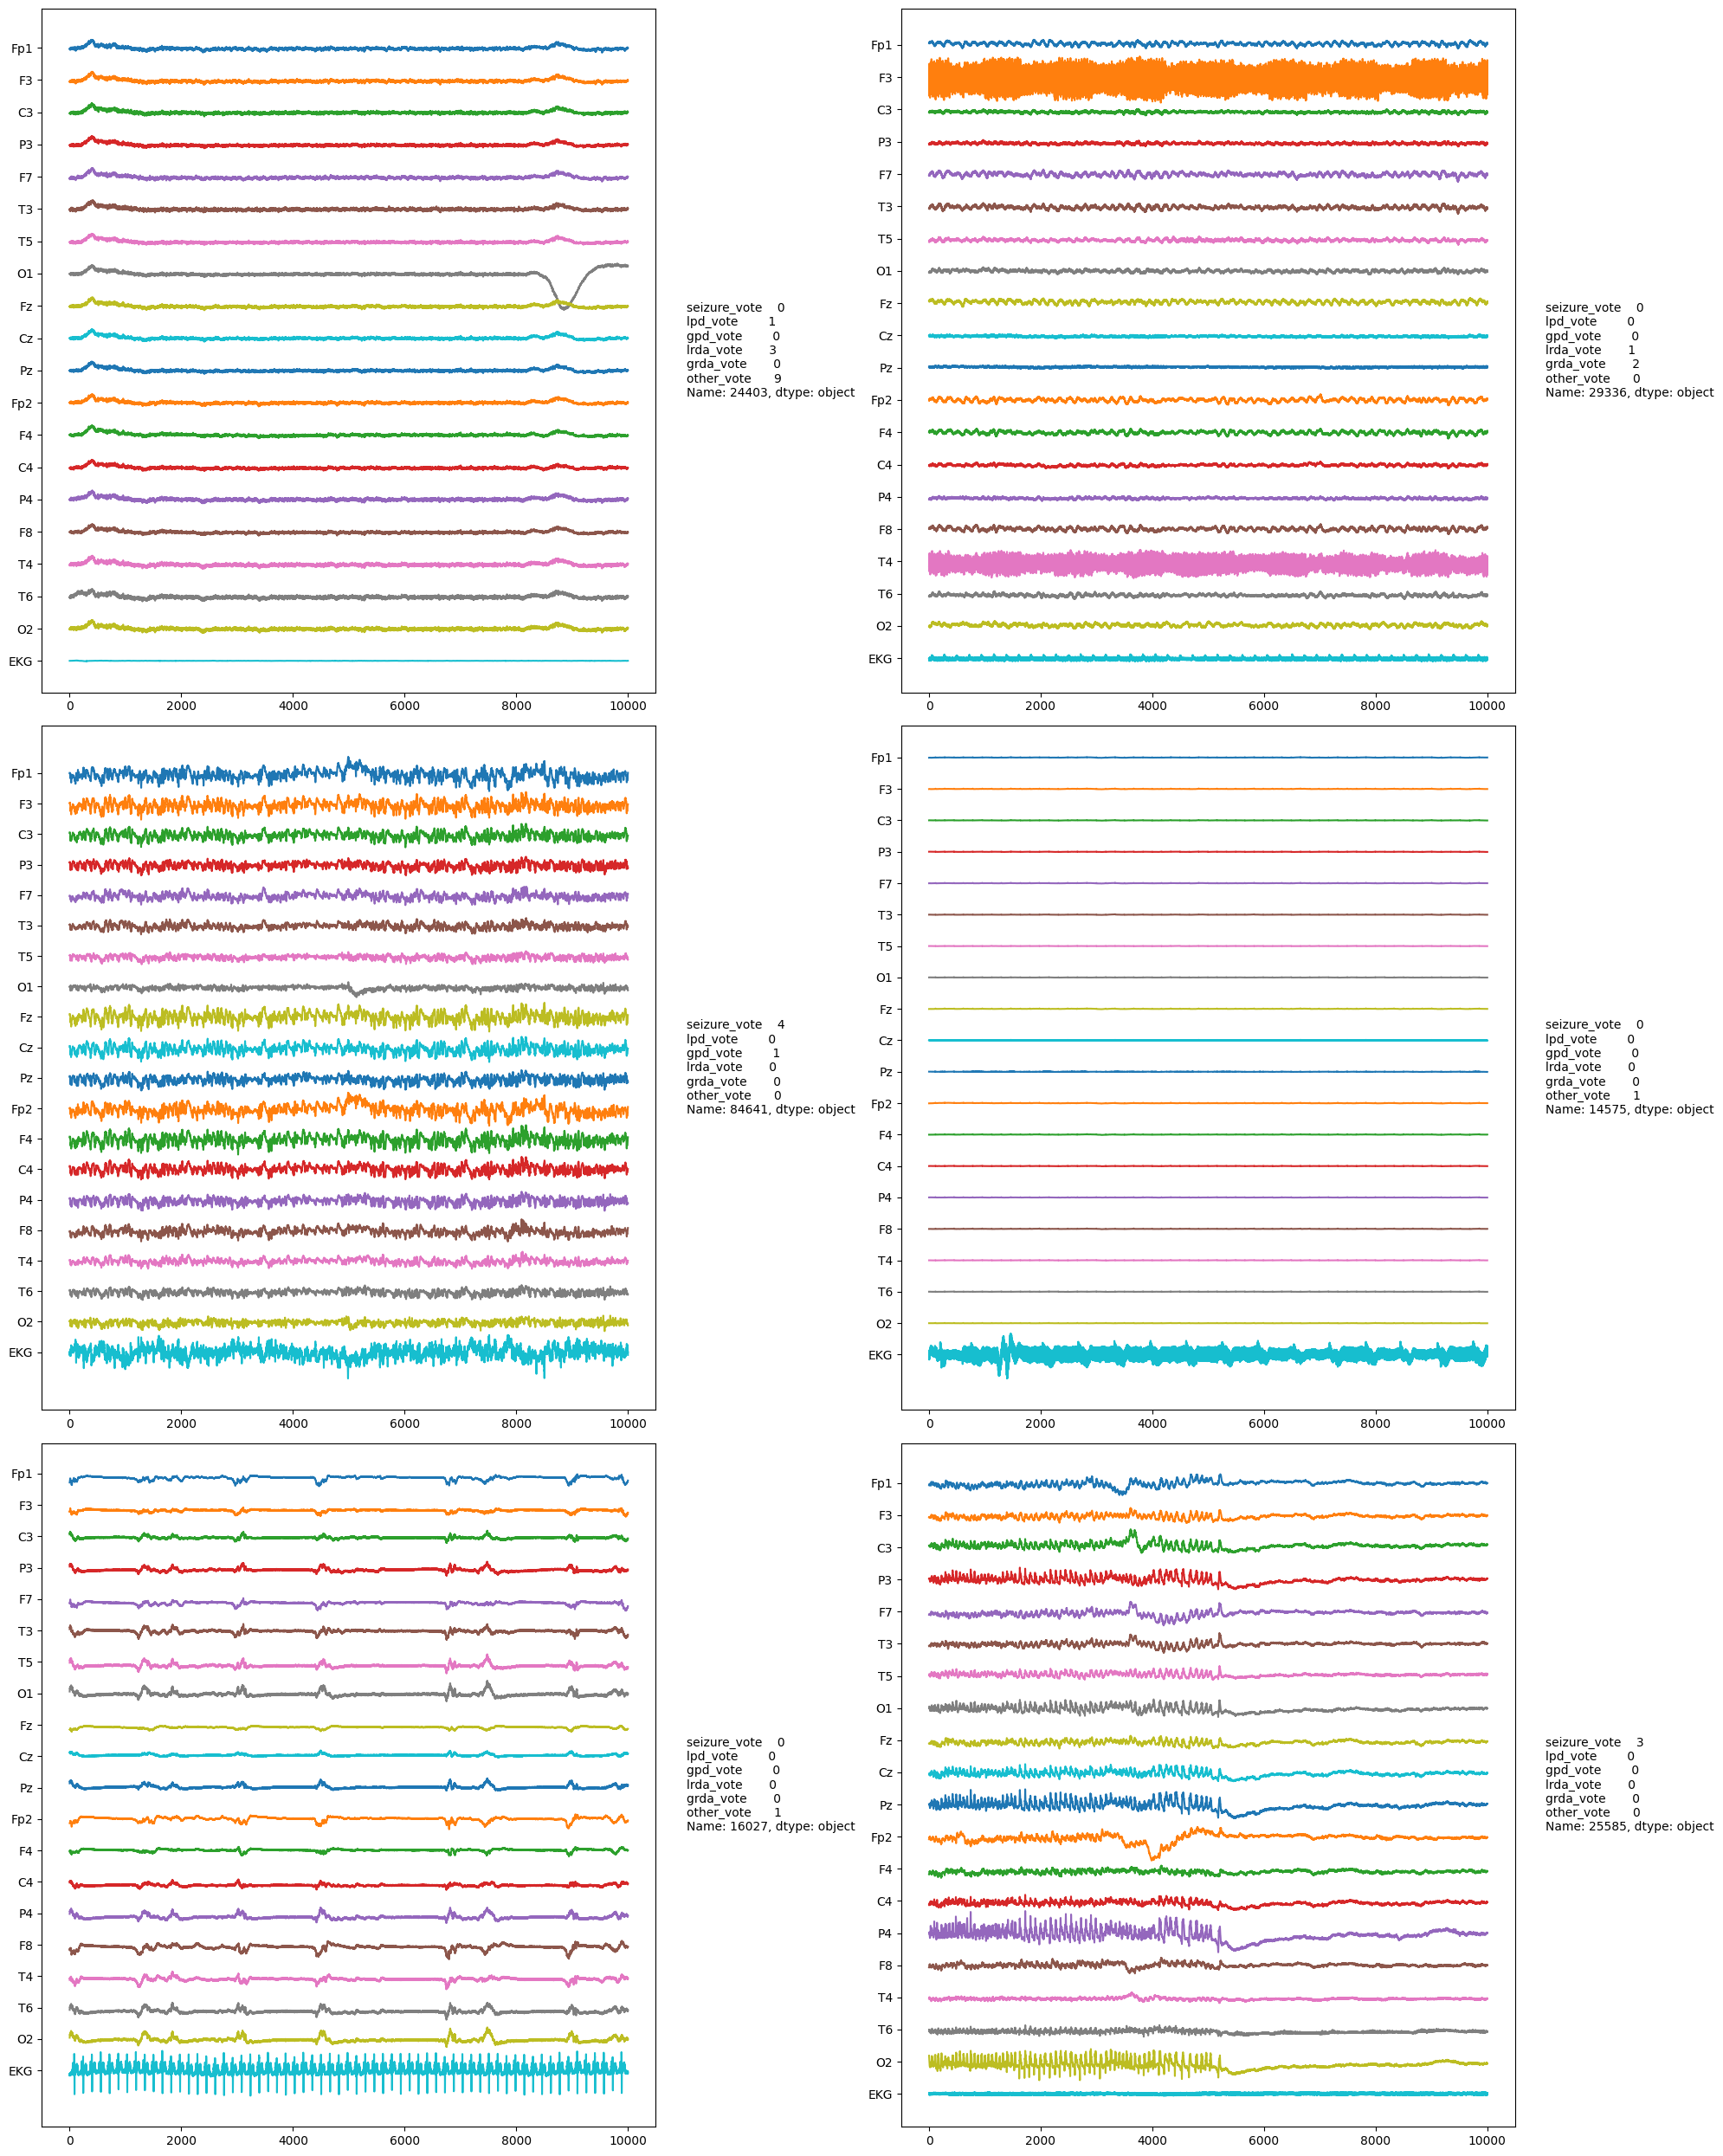

In [15]:
features = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3']
features = pd.read_parquet(f'{train_eegs_dir}/{1628180742}.parquet').columns

def parquet_to_numpy(eeg_row_id, features):
    offset = int(train_df.iloc[eeg_row_id]['eeg_label_offset_seconds'])
    eeg_id = int(train_df.iloc[eeg_row_id]['eeg_id'])
    eeg_df = pd.read_parquet(f'{train_eegs_dir}/{eeg_id}.parquet')
    eeg_df = eeg_df.iloc[offset*200:(offset+50)*200][features]
    eeg_np = eeg_df.to_numpy()
    return eeg_np

def plot_sample(row, ax):
    eeg_data = parquet_to_numpy(row, features)

    dy = (eeg_data.min() - eeg_data.max()) * 0.7
    tics = [dy*i for i in range(len(features))]
    ax.set_yticks(tics, labels=features)

    for i in range(eeg_data.shape[1]):
        ax.plot(np.arange(eeg_data.shape[0]), eeg_data[:,i] + i*dy)

    annotation_text = f"{train_df.iloc[row][['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']]}"
    ax.annotate(annotation_text, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=10, ha='left', va='center')


fig, axs = plt.subplots(3, 2, figsize=(20,25))

axs = axs.flatten()

for i, ax in zip(np.random.randint(0, len(train_df), 6), axs):
    plot_sample(i, ax)

plt.tight_layout()
plt.show()